#### Business Problem and Dataset

* This case and dataset is taken from the CRM course on www.miuul.com. The dataset contains the sales data of the FLO company.

* FLO, an online shoe store, wants to segment its customers and determine marketing strategies according to these segments. To this end, the behaviors of the customers will be defined and groups will be formed according to the clustering in these behaviors.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
sns.set(style="ticks")
sns.set_style("darkgrid")
dff=pd.read_csv("../input/rfm-data/rfm_data.csv")
df=dff.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [2]:
# first look to dataframe
def check_df(df):
    print("--------------Shape --------------------------------")
    print(df.shape)
    print("------- ------Dtypes -------------------------------")
    print(df.dtypes)
    print("--------------- NA ----------------------------------")
    print(df.isnull().sum().sort_values(ascending=False))
check_df(df)

--------------Shape --------------------------------
(19945, 12)
------- ------Dtypes -------------------------------
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
--------------- NA ----------------------------------
master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
o

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [4]:
# creating amount of total spending and number of total order for each customer

df["total_customer_value"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
df["total_order_number"] = df["order_num_total_ever_offline"] + df["order_num_total_ever_online"]

In [5]:
# converting time variables form object to datetime

df["first_order_date"]=pd.to_datetime(df["first_order_date"],yearfirst=True)
df["last_order_date"]=pd.to_datetime(df["last_order_date"],yearfirst=True)
df["last_order_date_online"]=pd.to_datetime(df["last_order_date_online"],yearfirst=True)
df["last_order_date_offline"]=pd.to_datetime(df["last_order_date_offline"],yearfirst=True)

In [6]:
df.groupby("order_channel").agg({"total_customer_value":"sum","total_order_number":"sum","order_channel":"count"})

,total_customer_value,total_order_number,order_channel
order_channel,,,
Android App,7819062.76,52269.0,9495
Desktop,1610321.46,10920.0,2735
Ios App,2525999.93,15351.0,2833
Mobile,3028183.16,21679.0,4882


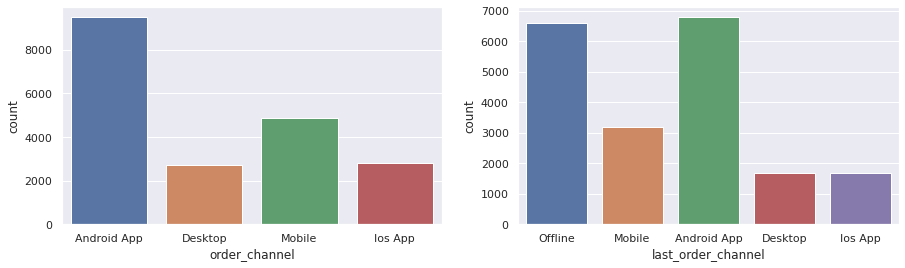

In [7]:
fig,axes=plt.subplots(1,2,figsize=(15,4))
sns.countplot(x="order_channel",data=df,ax=axes[0]);
sns.countplot(x="last_order_channel",data=df,ax=axes[1]);

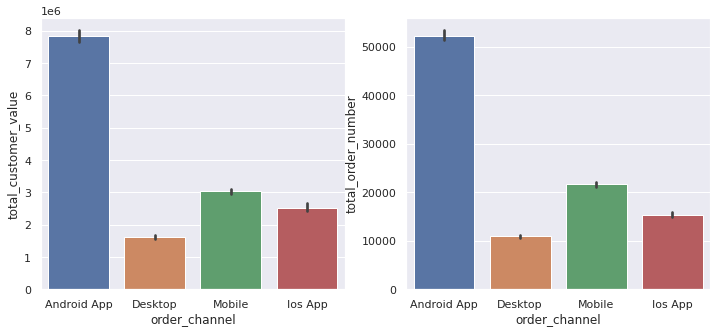

In [8]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.barplot(x="order_channel",y="total_customer_value",data=df,estimator=np.sum,ax=axes[0]);
sns.barplot(x="order_channel",y="total_order_number",data=df,estimator=np.sum);


As it can be seen from the graphs, order_channel is the android app with the most shopping and spending money.

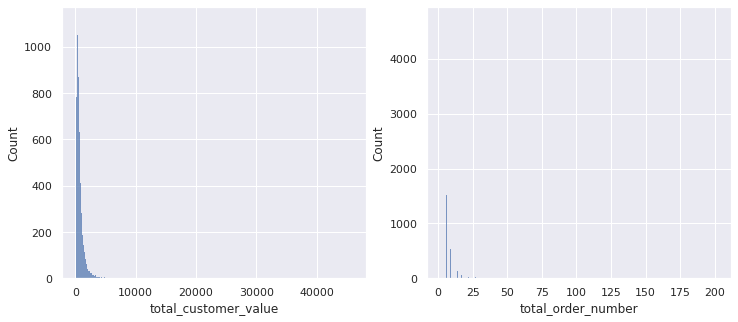

In [9]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.histplot(x="total_customer_value",data=df,ax=axes[0]);
sns.histplot(x="total_order_number",data=df,ax=axes[1]);

In [10]:
# top 10 customers who spend the most
df.sort_values("total_customer_value",ascending=False).head(10)[["master_id","total_customer_value"]]

,master_id,total_customer_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,12103.15


In [11]:
# 10 customers with the most orders
df.sort_values("total_order_number",ascending=False).head(10)[["master_id","total_order_number"]]

,master_id,total_order_number
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,131.0
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,82.0
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.0
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,75.0
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,70.0
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,70.0


In [12]:
# Analysis date was selected 2 days after the last order date.

print("last_order_date:",df["last_order_date"].max())
today_date = dt.datetime(2021, 6, 1)
print("analysis date:",today_date)

last_order_date: 2021-05-30 00:00:00
analysis date: 2021-06-01 00:00:00


In [13]:
rfm = df.groupby('master_id').agg({'last_order_date': lambda last_order_date: (today_date - last_order_date.max()).days, # recency
                                     'total_order_number': lambda total_order_number: total_order_number.nunique(),      # frequency
                                     'total_customer_value': lambda total_customer_value: total_customer_value.sum()})   # monetary

In [14]:
rfm.columns=['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,1,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,1,269.47
000be838-85df-11ea-a90b-000d3a38a36f,213,1,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,1,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,1,1620.33


In [15]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,19945.0,134.458360,103.281149,2.00,43.00,111.00,202.00,367.0
frequency,19945.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.0
monetary,19945.0,751.244287,895.402173,44.98,339.98,545.27,897.78,45905.1


To determine customer segments, frequency and recency values are divided into 5 parts with the qcut function. and is scored between 1 and 5. and 5 points are given to the person who shopped most recently, that is, the person with less recency value is more valuable.
In monetary and frequency, the lowest value was given 1 point, the highest value 5 points.

In [16]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [17]:
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [18]:
rfm["RFM_SCORE"]

master_id
00016786-2f5a-11ea-bb80-000d3a38a36f    51
00034aaa-a838-11e9-a2fc-000d3a38a36f    11
000be838-85df-11ea-a90b-000d3a38a36f    21
000c1fe2-a8b7-11ea-8479-000d3a38a36f    51
000f5e3e-9dde-11ea-80cd-000d3a38a36f    51
                                        ..
fff1db94-afd9-11ea-b736-000d3a38a36f    25
fff4736a-60a4-11ea-8dd8-000d3a38a36f    45
fffacd34-ae14-11e9-a2fc-000d3a38a36f    15
fffacecc-ddc3-11e9-a848-000d3a38a36f    35
fffe4b30-18e0-11ea-9213-000d3a38a36f    15
Name: RFM_SCORE, Length: 19945, dtype: object

In [19]:
# rfm customer segments

segment_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [20]:
rfm['segment'] = rfm['RFM_SCORE'].replace(segment_map, regex=True)

In [21]:
rfm=rfm.reset_index()
rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,1,776.07,5,1,4,51,new_customers
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,1,269.47,1,1,1,11,hibernating
2,000be838-85df-11ea-a90b-000d3a38a36f,213,1,722.69,2,1,4,21,hibernating
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,1,874.16,5,1,4,51,new_customers
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,1,1620.33,5,1,5,51,new_customers


In [22]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency          monetary      
                           mean count      mean count        mean count
segment                                                                
about_to_sleep       113.396994  1597       1.0  1597  696.260914  1597
at_Risk              243.290425  3154       1.0  3154  652.210117  3154
cant_loose           243.276373  1621       1.0  1621  663.802424  1621
champions             17.442284  1594       1.0  1594  921.381092  1594
hibernating          243.963608  3160       1.0  3160  626.845114  3160
loyal_customers       86.464612  3179       1.0  3179  784.635225  3179
need_attention       112.617949   780       1.0   780  716.807667   780
new_customers         17.389549   842       1.0   842  917.125534   842
potential_loyalists   36.558054  3247       1.0  3247  880.911783  3247
promising             57.329442   771       1.0   771  782.135603   771

company's request 1:
The company is adding a new women's shoe brand. The product prices of the brand it includes are above the general customer preferences. For this reason, it is desired to contact the customers in the profile that will be interested in the promotion of the brand and product sales. Those who shop from their loyal customers (champions, loyal_customers) and women category are the customers to be contacted specifically. Save the id numbers of these customers to the csv file.

In [23]:
target_customers_index=rfm[(rfm["segment"]=="champions") | (rfm["segment"]=="loyal_customers")]["master_id"].index.to_list()

target_customers=df.loc[target_customers_index]

target_customers=target_customers[target_customers["interested_in_categories_12"].str.contains("KADIN")].head()

target_customers["master_id"].to_csv("request_1.csv")

* company's request 2: Nearly 40% discount is planned for Men's and Children's products. It is aimed to specifically target customers who are good customers in the past, but who have not shopped for a long time, who are interested in categories related to this discount, who should not be lost, those who are asleep and new customers. Save the ids of the customers in the appropriate profile to the csv file.

* According to the company's request, we must find customers in the following segments: can't loose them, at risk ,about to sleep, new customers.

In [24]:
rfm[(rfm["segment"]=="cant_loose") | (rfm["segment"]=="at_Risk") |
    (rfm["segment"]=="about_to_sleep") |
    (rfm["segment"]=="new_customers")]["master_id"].to_csv("request_2.csv")